In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df_1 = df.dropna()
df_1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
number = LabelEncoder()
df_1['gender'] = number.fit_transform(df_1['gender'])
df_1['ever_married'] = number.fit_transform(df_1['ever_married'])
df_1['work_type'] = number.fit_transform(df_1['work_type'])
df_1['Residence_type'] = number.fit_transform(df_1['Residence_type'])
df_1['smoking_status'] = number.fit_transform(df_1['smoking_status'])

C:\Users\asus\AppData\Local\Temp/ipykernel_2096/1938741493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['gender'] = number.fit_transform(df_1['gender'])
C:\Users\asus\AppData\Local\Temp/ipykernel_2096/1938741493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ever_married'] = number.fit_transform(df_1['ever_married'])
C:\Users\asus\AppData\Local\Temp/ipykernel_2096/1938741493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

# Data balancing process

In [6]:
df_1['stroke'].unique()

array([1, 0], dtype=int64)

In [7]:
df_1['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [8]:
df_2 = (df_1.groupby('stroke', as_index=False)
       .apply(lambda X: X.sample(n=209))
       .reset_index(drop=True))

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   int32  
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   int32  
 6   work_type          4909 non-null   int32  
 7   Residence_type     4909 non-null   int32  
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   int32  
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 402.7 KB


In [11]:
df_2['stroke'].value_counts()

0    209
1    209
Name: stroke, dtype: int64

# Split Dataset

In [12]:
df_2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30290,0,40.0,0,0,1,2,1,70.13,23.6,2,0
1,62715,1,82.0,0,1,1,2,1,57.56,27.5,2,0
2,45945,1,46.0,0,1,1,2,1,178.76,24.1,2,0
3,71533,1,50.0,0,0,1,2,1,158.31,32.8,1,0
4,29869,1,49.0,0,0,1,2,1,199.96,28.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,48405,1,80.0,0,1,1,2,1,68.53,24.2,3,1
414,5317,0,79.0,0,1,1,2,1,214.09,28.2,2,1
415,32221,1,60.0,0,1,1,2,1,91.92,35.9,3,1
416,2458,0,78.0,0,0,1,2,0,235.63,32.3,2,1


In [13]:
X = df_2.iloc[:,1:10]
y = df_2['stroke']

In [14]:
 from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, stratify=y)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 9)
(126, 9)
(292,)
(126,)


In [21]:
y_train[y_train==1].size

146

In [18]:
y_train[y_train==0].size

146

In [19]:
y_test[y_test==1].size

63

In [20]:
y_test[y_test==0].size

63

# Naive Bayes

In [22]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [23]:
nb.score(X_train, y_train)

0.7671232876712328

In [42]:
nb.score(X_test, y_test)

0.6984126984126984

In [24]:
y_pred = nb.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
print(confusion_matrix(y_test, y_pred))

[[42 21]
 [17 46]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        63
           1       0.69      0.73      0.71        63

    accuracy                           0.70       126
   macro avg       0.70      0.70      0.70       126
weighted avg       0.70      0.70      0.70       126



# Visualisasi Hasil

In [38]:
from jcopml.plot import plot_confusion_matrix

Matplotlib is building the font cache; this may take a moment.


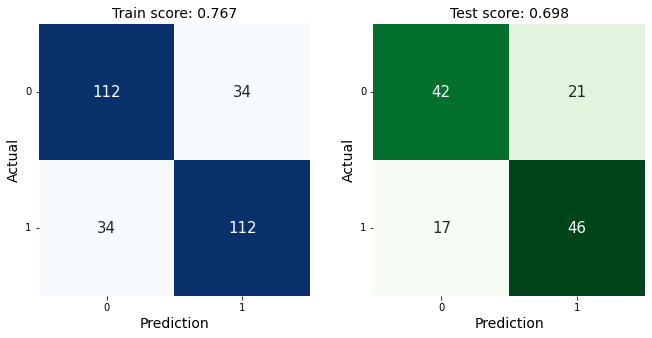

In [41]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, nb)